<a href="https://colab.research.google.com/github/kozz84/particle_analysis/blob/main/Size_distribution_100Hz_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Size_distribution_100Hz_NN

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/CIOP/size distrubution_100Hz.csv',sep=';')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# PREPROCESSING
def preprocessing(df):
    df = df.copy()
    df = df.drop(['Label',' '],axis=1)
    df.dropna(inplace=True)
    y = df['Group']
    X = df.drop('Group',axis=1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    scaler = StandardScaler()
    X_train = pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
    X_test = pd.DataFrame(scaler.fit_transform(X_test),columns=X_test.columns)
    return X_train, X_test, y_train, y_test,scaler
X_train, X_test, y_train, y_test,scaler = preprocessing(data)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
model = Sequential()
model.add(Dense(17,activation='relu'))
#model.add(Dense(10,activation='relu'))
#model.add(Dense(4,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer = 'adam',
              loss='binary_crossentropy')
early_stop = EarlyStopping(monitor='val_loss', 
                           mode='min',
                           verbose=1,
                           patience=25)

In [ ]:
model.fit(X_train,
          y_train,
          epochs=250,
          validation_data=(X_test,y_test),
          callbacks=[early_stop],
          verbose=0)

Epoch 98: early stopping


In [ ]:
history = pd.DataFrame(model.history.history)

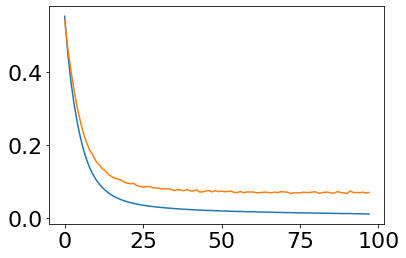

In [ ]:
plt.plot(history)

In [ ]:
y_pred = pd.DataFrame((model.predict(X_test) > 0.5).astype("int32"))

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
accuracy_score(y_test,y_pred)

0.9694323144104804

In [ ]:
confusion_matrix(y_test,y_pred)

array([[122,   6],
       [  1, 100]])

In [ ]:
data_vis = X_test.copy()

In [ ]:
data_vis=pd.DataFrame(scaler.inverse_transform(data_vis),columns=data_vis.columns)

In [ ]:
data_vis['y_pred'] = y_pred

In [ ]:
y_test

218     0
819     1
501     0
651     1
323     0
       ..
361     0
292     0
1131    1
558     0
448     0
Name: Group, Length: 229, dtype: int64

In [ ]:
data_vis['y_test'] = y_test.values

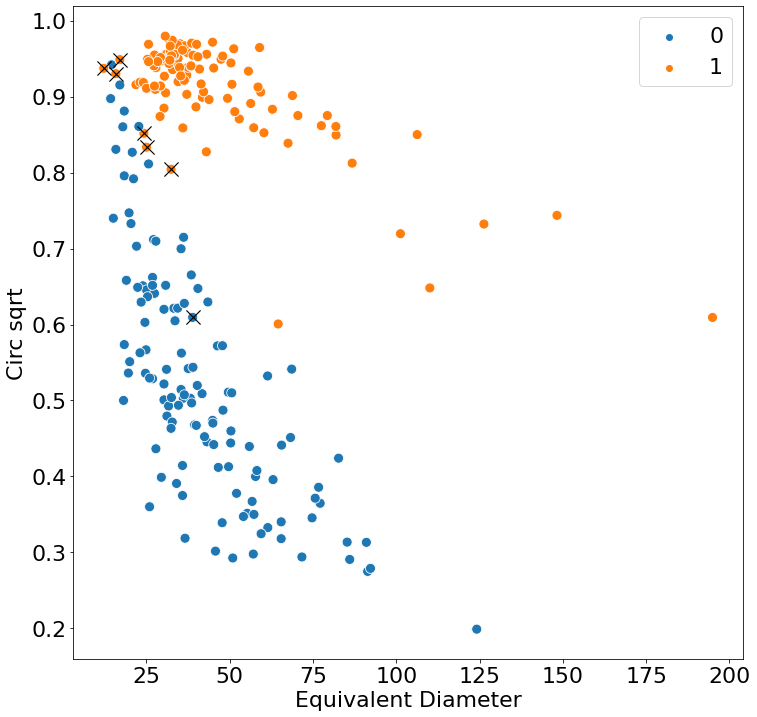

In [ ]:
plt.figure(figsize=(12,12))
plt.rcParams.update({'font.size': 22})
sns.scatterplot(data=data_vis,
                y='Circ sqrt',
                x='Equivalent Diameter',
                hue='y_pred',
                s=100)
sns.scatterplot(data=data_vis[data_vis['y_pred'] != data_vis['y_test']],
                y='Circ sqrt',
                x='Equivalent Diameter',
                color='black',
                s=200,
                marker="x")